# Fake News Detector
This is a very naive and simple approach which achieves accuracy of around 0.77 (Naive Bayes) and 0.79 (Linear SVM).

You can definitely do better! But it should give you at least a first framework with which to begin. Here are some things to try:

## Feature Engineering:
Extract additional features from the text, such as:
- Number of words in the article.
- Number of sentences in the article.
- Average word length.
- Presence of specific keywords or phrases.
- Punctuation counts.
- Capitalization features (e.g., ratio of capitalized words).
    
## Word Embeddings:
Use pre-trained word embeddings like Word2Vec, GloVe, or fastText to capture semantic relationships between words. This can provide a richer representation of your text compared to a simple bag-of-words model.

## Deep Learning:
Implement a deep neural network, perhaps a recurrent neural network (RNN) or long short-term memory (LSTM) network, to capture sequential dependencies in the text.

In [2]:
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Download NLTK stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/mark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load the dataset
df = pd.read_csv("../data/fake_news.csv")

In [5]:
df_genuine = df.copy()
df_genuine.drop('fake_news_article', axis=1, inplace=True)  # Drop the 'fake_news_article' column
df_genuine.rename(columns={'content': 'article'}, inplace=True)  # Rename 'content' to 'article'
df_genuine['is_fake'] = 0  # Set 'is_fake' to 0 for genuine news

In [6]:
# Create a dataframe with fake news
df_fake = df.copy()
df_fake.drop('content', axis=1, inplace=True)  # Drop the 'content' column
df_fake.rename(columns={'fake_news_article': 'article'}, inplace=True)  # Rename 'fake_news_article' to 'article'
df_fake['is_fake'] = 1  # Set 'is_fake' to 1 for fake news

In [7]:
# Concatenate the two dataframes
df_combined = pd.concat([df_genuine, df_fake], ignore_index=True)

In [36]:
# Define features (X) and target (y)
X = df_combined['article']
y = df_combined['is_fake']

In [37]:
# Preprocess the text
# Use NLTK stopwords
stop_words = list(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization and stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in text.split()]

    # Extract 1-grams (with stopwords removed), 2-grams and 3-grams
    ngrams = [stemmer.stem(word) for word in text.split() if word not in stop_words] + \
        ["_".join(words[i:i+2]) for i in range(len(words)-1)] + \
        ["_".join(words[i:i+3]) for i in range(len(words)-2)]
    
    return " ".join(ngrams)

X = X.apply(preprocess_text)

In [38]:
X[0]

'video footag continu emerg mass sexual assault commit migrant women new year’ eve celebr german citi cologne. [breitbart london broke stori attack media german press final start report incid three day actual happened. media silenc stun german people, wonder one dare report massiv attack mani men mani women crowd event. latest video show men hurl firework crowd outsid city’ cathedral, caus panic among confus revel know turn. youtub user da schlüsselkind, upload one video, comment underneath: “what need happen complet resign merkel government? polit media wait for? civil war new stauffenberg [the german offic tri kill hitler] final take problem hand?” user add women surround group men “touch inappropriately”. 1, 000 men involved. breitbart london report monday women fear safeti larg number migrant men gather around them: one victim, 28 year old ‘katja l’ spoke ordeal tri make way wait room cologn railway station two girl boyfriend earli hour new year’ day. told der express — one largest

In [39]:
# Split the data into training and testing sets while maintaining equal class sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
# Create a TfidfVectorizer to convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [41]:
# Train a Multinomial Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [42]:
# Train a Linear SVM classifier
clf_svm = SVC(kernel='linear', C=1.0, random_state=42)
clf_svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [43]:
# Make predictions on the test set
y_pred_nb = clf_nb.predict(X_test_tfidf)
y_pred_svm = clf_svm.predict(X_test_tfidf)

In [44]:
# Evaluate the models
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [45]:
# Print the results
print(f"Accuracy (naive Bayes): {accuracy_nb}")
print("\nConfusion Matrix:")
print(conf_matrix_nb)
print("\nClassification Report:")
print(classification_rep_nb)

print(f"Accuracy (SVM): {accuracy_svm}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(classification_rep_svm)

Accuracy (naive Bayes): 0.766497461928934

Confusion Matrix:
[[167  30]
 [ 62 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       197
           1       0.82      0.69      0.75       197

    accuracy                           0.77       394
   macro avg       0.77      0.77      0.76       394
weighted avg       0.77      0.77      0.76       394

Accuracy (SVM): 0.7918781725888325

Confusion Matrix:
[[176  21]
 [ 61 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       197
           1       0.87      0.69      0.77       197

    accuracy                           0.79       394
   macro avg       0.80      0.79      0.79       394
weighted avg       0.80      0.79      0.79       394



Top 20 features:
           log_prob_genuine  log_prob_fake  log_prob_difference
th                -9.254818      -6.554490             2.700327
biden             -9.107197      -6.747194             2.360003
anti              -9.456893      -7.465050             1.991843
_s                -6.742881      -8.512283             1.769402
_000              -7.134629      -8.877213             1.742584
_biden            -9.230823      -7.667532             1.563290
prais             -8.918501      -7.528001             1.390500
joe_biden         -9.277325      -7.944899             1.332426
smith             -8.865189      -7.540846             1.324343
_com              -7.607956      -8.898539             1.290583
non               -9.398523      -8.124505             1.274018
a_shock           -9.429728      -8.193860             1.235868
_despit           -8.386572      -7.156541             1.230031
despit            -8.449681      -7.223669             1.226012
heroic            -9.40

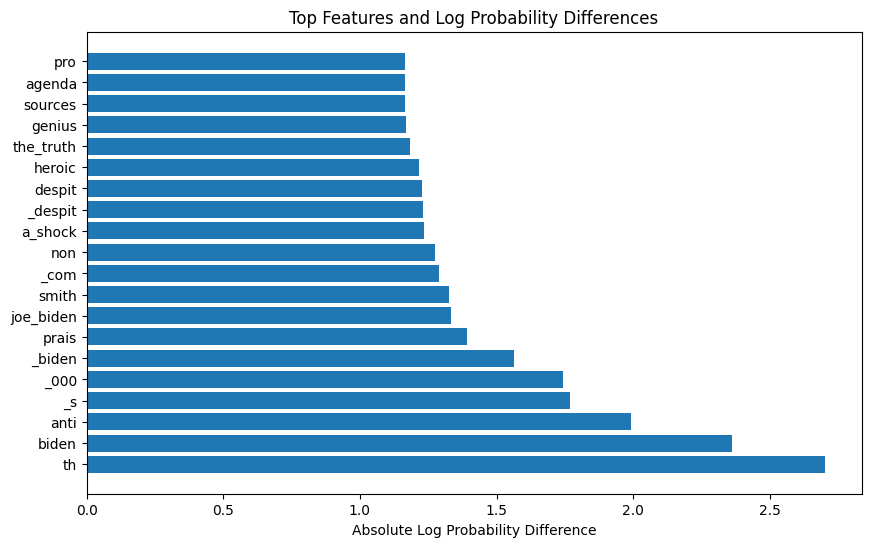

In [46]:
# Extract feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities from the trained Naive Bayes classifier
log_probabilities = clf_nb.feature_log_prob_

# Create a dataframe to store feature names and their log probabilities
feature_importance_df = pd.DataFrame(log_probabilities, columns=feature_names).transpose()

# Rename the columns for better interpretation
feature_importance_df.columns = ['log_prob_genuine', 'log_prob_fake']

# Calculate the absolute difference between log probabilities
feature_importance_df['log_prob_difference'] = abs(feature_importance_df['log_prob_genuine'] - feature_importance_df['log_prob_fake'])

# Sort the dataframe by the absolute log probability difference
sorted_features = feature_importance_df.sort_values(by='log_prob_difference', ascending=False)

# Display the top N features
top_n_features = 20
print(f"Top {top_n_features} features:")
print(sorted_features.head(top_n_features))

# Plot the top features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_features.index[:top_n_features], sorted_features['log_prob_difference'][:top_n_features])
plt.xlabel('Absolute Log Probability Difference')
plt.title('Top Features and Log Probability Differences')
plt.show()

Top 20 features:
      Feature  Coefficient
4091       th     3.689069
73       _000    -3.624283
1155    biden     3.448427
471        _s    -2.886322
1         000     2.595745
4140      the    -2.548622
3404    prais     2.342271
204      _com    -2.276058
924      anti     2.210668
364        _m    -1.708001
4141     the_    -1.698287
421       _or    -1.693598
223   _despit     1.666815
1417      com     1.593400
1694      don    -1.520454
1649     didn    -1.470899
612     _with     1.469109
4983      you    -1.465332
4617  triumph     1.440035
3881    smith     1.429872


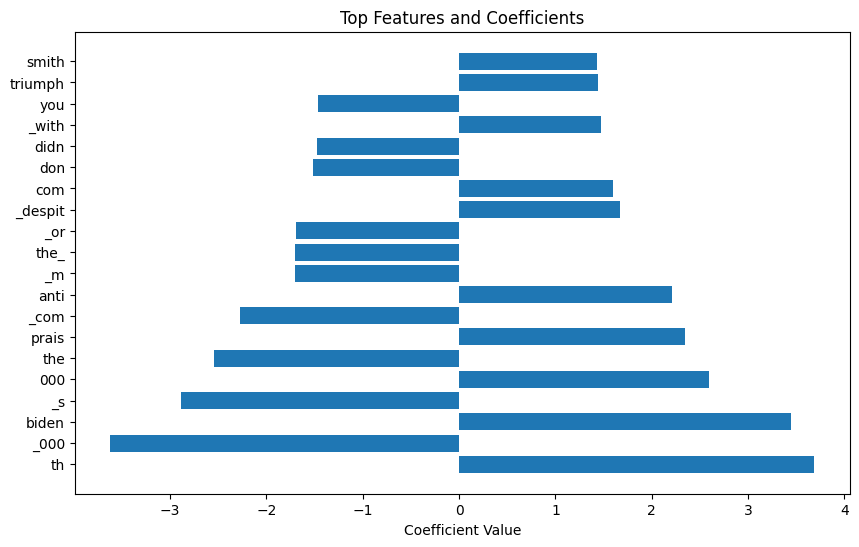

In [47]:
# Extract feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients and intercept from the trained Linear SVM classifier
coefficients = clf_svm.coef_.toarray()[0]  # Convert to a dense array
intercept = clf_svm.intercept_

# Create a dataframe to store feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the top N features based on absolute coefficient values
top_n_features = 20
sorted_features = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)
print(f"Top {top_n_features} features:")
print(sorted_features.head(top_n_features))

# Plot the top features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'][:top_n_features], sorted_features['Coefficient'][:top_n_features])
plt.xlabel('Coefficient Value')
plt.title('Top Features and Coefficients')
plt.show()